In [1]:
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
iris = load_iris()

# EDA

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Convert to Pandas Dataframe

In [4]:
iris_df = pd.DataFrame(np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

In [5]:
# Another way to convert

iris_df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_df['species'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris_df.drop('species',axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Correlation Equation

$$
{r} = \frac{n (\sum \limits _{i=1} ^{n} x_{i} y_{i}) - (\sum \limits _{i=1} ^{n} x_{i})(\sum \limits _{i=1} ^{n} y_{i})} {\sqrt {n (\sum \limits _{i=1} ^{n} x_{i}^2) (\sum \limits _{i=1} ^{n} x_{i})^2 - n (\sum \limits _{i=1} ^{n} y_{i}^2) (\sum \limits _{i=1} ^{n} y_{i})^2}}\
$$

#### Calculate correlation manually for better understanding

In [7]:
n = iris_df.shape[0]

In [8]:
corr_numerator = n * np.sum(iris_df['petal length (cm)']*iris_df['petal width (cm)']) - np.sum(iris_df['petal length (cm)']) * np.sum(iris_df['petal width (cm)'])

In [9]:
corr_denumerator = np.sqrt( (n * np.sum(iris_df['petal length (cm)']**2) - np.sum(iris_df['petal length (cm)'])**2) * (n * np.sum(iris_df['petal width (cm)']**2) - np.sum(iris_df['petal width (cm)'])**2) )

In [10]:
correlation = corr_numerator/corr_denumerator
correlation

0.9628654314027959

#### Plot these correlations

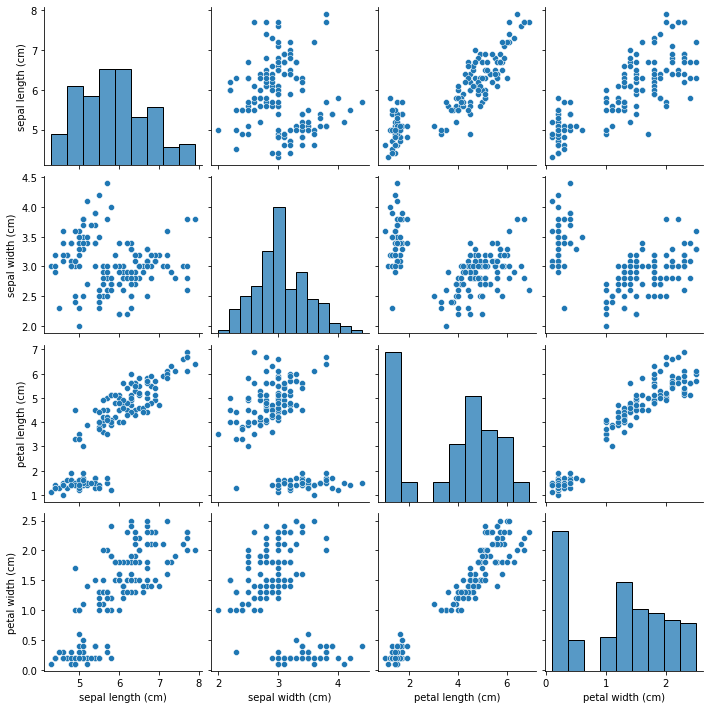

In [11]:
sns.pairplot(iris_df.drop('species',axis=1))

#### Let's choose two only features since these features have the highest correlation

In [12]:
df = iris_df[['petal length (cm)','petal width (cm)', 'species']]
df

,petal length (cm),petal width (cm),species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [13]:
df.describe()

,petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000
mean,3.758000,1.199333,1.000000
std,1.765298,0.762238,0.819232
min,1.000000,0.100000,0.000000
25%,1.600000,0.300000,0.000000
50%,4.350000,1.300000,1.000000
75%,5.100000,1.800000,2.000000
max,6.900000,2.500000,2.000000


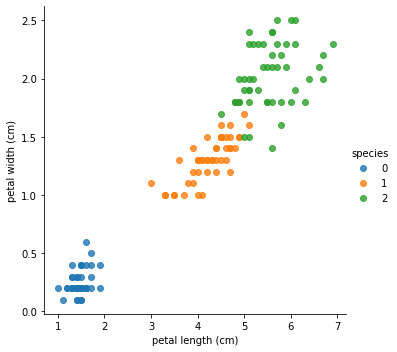

In [14]:
sns.lmplot(x='petal length (cm)',y='petal width (cm)',data=df,fit_reg=False,hue='species')

### Split training & testing data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('species',axis=1), df['species'], test_size=0.33, random_state=42)

# Random Forest with sklearn
### Import Random Forest library

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred = dtree.predict(X_test)

### Evaluate the prediction

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]], dtype=int64)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### WOW! We found 100 % prediction accuracy.

### Predict new datapoint

In [24]:
new_petal_length = 5
new_petal_width = 1.9

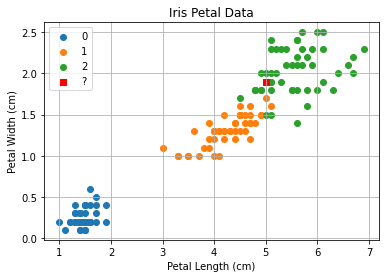

In [25]:
fig, ax = plt.subplots()
for spc, d in df.groupby('species'):
    ax.scatter(d['petal length (cm)'], d['petal width (cm)'], label=spc)

plt.scatter(new_petal_length,
            new_petal_width,
            marker='s',
            color='red',
            label='?')

plt.legend(loc='upper left')
plt.title('Iris Petal Data')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid()

In [26]:
target_pred = dtree.predict(pd.DataFrame({'petal length (cm)':[new_petal_length],'petal width (cm)':[new_petal_width]}))
target_pred

array([2])

In [27]:
iris['target_names'][target_pred][0]

'virginica'